# Exploring, Analyzing and Visualizing Data

Pandas' rich feature set can do all these things and more.  In this notebook we'll explore and work with a simple dataset to highlight many of these features.  

<br>

## Notebook Setup
---

### Libraries

In [1]:
## import modules
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Notebook Settings

In [2]:
## allow multiple statements to show output (i.e., not just the last)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## disable the Pandas "setting a copy of a slice" warning
# pd.options.mode.chained_assignment = None

## disable the "convert inf values to NaN" warning
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

### set default number of DataFrame rows printed to 8
#pd.set_option('display.max_rows', 8)

# set the size of matplotlib "figures" (i.e. images)
matplotlib.rcParams['figure.figsize'] = [7.5,5.0]

### Quick Views of Data

In [18]:
# import a large dataset, set the date column (EST) to the index and set the type to datetime64
dfny = pd.read_csv('data/weather_newyork.csv', index_col='EST', parse_dates=['EST'], dayfirst=False)
dfny.loc['2016-01': '2016-01-05']

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
EST,,,,,,,,,,,,,,,,,,,,,
2016-01-01,42,38,34,26,23,16,59,52,44,30.06,...,10.0,10.0,10.0,17.0,8.0,26.0,0.00,5.0,NaN,281
2016-01-02,40,36,32,20,18,15,52,46,40,30.10,...,10.0,10.0,10.0,15.0,7.0,23.0,0.00,3.0,NaN,275
2016-01-03,45,40,35,23,21,19,56,47,37,29.94,...,10.0,10.0,10.0,17.0,8.0,26.0,0.00,1.0,NaN,277
2016-01-04,36,25,14,23,9,0,59,44,28,30.32,...,10.0,10.0,10.0,21.0,9.0,31.0,0.00,3.0,NaN,345
2016-01-05,29,20,11,1,-3,-6,58,41,24,30.62,...,10.0,10.0,10.0,20.0,5.0,30.0,0.00,0.0,NaN,333


#### Viewing Large Tables in Searchable HTML

Large tables are not easily viewable in Jupyter; the 'to_page()' function writes any dataframe to an HTML page.

In [4]:
def to_page(df, filename='dataview.html'):
    import os
    wfh = open(filename, 'w')
    if os.path.isfile('table_stylesheet.html'):  
        wfh.write(open('table_stylesheet.html').read() + '\n')
    wfh.write(df.to_html())
    wfh.close()

to_page(dfny)       # <-- anywhere below this cell, call this function 
                    #     with any dataframe to see it in dataview.html 

After running the above code, look in the folder this notebook is in to find <B>dataview.html</B>, and double-click to view (or open in your browser).  Text can be searched with a browser find (usually <B>Cmd-F/Ctrl-F</B>).  

Anytime you wish to view the whole of a DataFrame, call <B>to_page(<I>df</I>)</B> (assuming your DataFrame is named <B><I>df</I></B>) and refresh the browser window.  

#### Plotting a simple visualization

It's important to check in on your data from time to time in a way that eyeballing a table won't allow.  Anomalies, outliers, and the general "character" of the data can be conveyed with a simple chart.  

<Axes: xlabel='EST'>

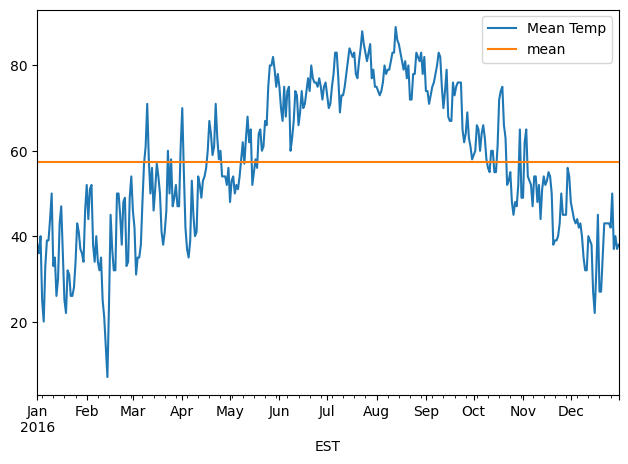

In [39]:
# view mean temp column in a line chart
df = pd.DataFrame({ 'Mean Temp': dfny['Mean TemperatureF'], 'mean': dfny['Mean TemperatureF'].mean()});
df.plot()

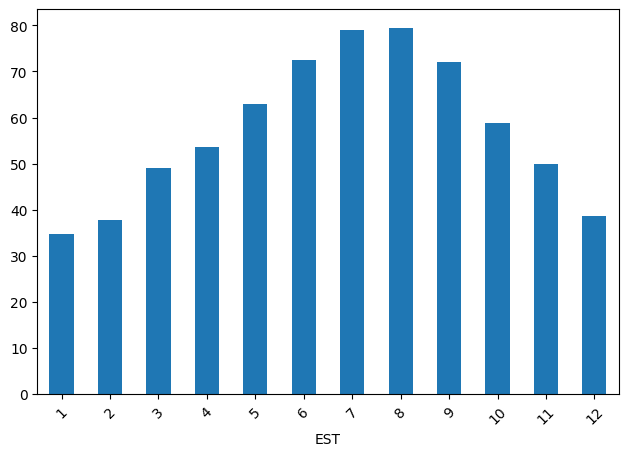

In [10]:
# group mean temp by month
monthly_mean = dfny.groupby([dfny.index.month])['Mean TemperatureF'].mean()

# plot a bar chart of monthly mean temp
monthly_mean.plot(kind='bar', rot=45);

In [ ]:
# delete previous data - we don't need it now
del dfny; del monthly_mean

### Data

This notebook uses the following datasets, which represent a record of sales as well as corresponding customer data:

`data/customer_sales.csv`

`data/customers.csv`

We begin by converting all our string columns to type 'string' -- by default they are assigned the generic dtype `object`.  This helps clarify the intended type for these columns, ensures that numeric values like 'PotentialCustomerID' will not be seen as integers (and respond to methods like `.sum()`), and is more efficient in terms of storage and string operations we might want to apply.

In [23]:
# read sales data
df_sales_all = pd.read_csv("data/customer_sales.csv")

# convert string columns to string type
# numeric values should be excluded from aggregations and other numeric summaries
df_sales_all.PotentialCustomerID = df_sales_all.PotentialCustomerID.astype('string')
df_sales_all.region              = df_sales_all.region.astype('string')
df_sales_all.marketing_exposure  = df_sales_all.marketing_exposure.astype('string')
df_sales_all.num_accounts        = df_sales_all.num_accounts.astype('string')

# only interested in existing sales  
df_sales = df_sales_all.loc[ (df_sales_all.sale_amount > 0) ]
df_sales

# .query() method:  alternative to .loc[] with condition
df_sales2 = df_sales_all.query('sale_amount > 0')

to_page(df_sales)

,PotentialCustomerID,sale,sale_amount,region,age,marketing_exposure,activity,income,num_accounts,UrbanRural,current_customer
0,1040699,Yes,766.25,10,66,5,Med,30462,0,Urban,No
1,1004999,Yes,149.13,12,62,3,Med,22186,1,Urban,Yes
2,1068740,Yes,1015.12,30,86,4,Med,85937,3,Urban,Yes
3,1098821,Yes,914.92,30,39,4,High,85227,0,Urban,No
6,1000429,Yes,1133.78,30,47,5,Med,74165,1,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...
15993,1075889,Yes,590.79,21,59,1,High,31307,0,Urban,No
15994,1053596,Yes,336.53,28,70,3,Low,76886,1,Urban,Yes
15995,1019241,Yes,657.26,8,85,4,Low,43769,0,Urban,No
15996,1038843,Yes,572.79,25,23,1,Med,19736,1,Urban,Yes


In [24]:
## import 'clean' customer data (same as that we cleaned 
## and saved in the 'data cleaning' notebook)
df_customer = pd.read_csv('data/customers_clean.csv')
df_customer

,CustomerID,FirstName,LastName,UrbanRural,Birthdate,StreetAddress,City,State,CountryCode,Zipcode,CreditScore,SignUpProgram,MiddleInitial,SignUpProgramClean,urban_rural_alt,UrbanRural_cat,UrbanRural_renamed
0,481,David,Bonet,Urban,1986-02-21,2466 Oliver Street,Dallas,TX,US,75201,603.0,Bronze Member,S,Bronze,City Folk,Urban,City
1,450,William,Allen,Urban,1986-01-11,2997 Lowndes Hill Park Road,Bakersfield,CA,US,93307,548.0,Sign Up Silver,NaN,Silver,City Folk,Urban,City
2,476,Kathleen,Pearson,*Missing*,1979-04-29,2137 Golden Ridge Road,East Glenville,NY,US,12302,463.0,Bronze Member,J,Bronze,*Missing*,NaN,NaN
3,435,Carolin,Gil,Urban,1996-06-02,3556 Cooks Mine Road,Espanola,NM,US,87532,729.0,Always Gold,NaN,Gold,City Folk,Urban,City
4,369,Matthew,Williams,Urban,1961-06-09,122 Morris Street,Pearsall,TX,US,78061,654.0,Sign Up Silver,NaN,Silver,City Folk,Urban,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,107,Lan,Witt,*unknown*,NaN,3659 Norman Street,Huntington Park,CA,US,90255,435.0,Sign Up gold,NaN,Gold,*unknown*,NaN,NaN
496,271,Peter,Hernandez,Rural,1867-08-31,3400 Glory Road,Shelbyville,TN,US,37160,623.0,bronze from the beg,D,Bronze,Rural,Rural,Outlying Areas
497,349,Dorothy,Harden,Urban,1957-03-09,3743 Cityview Drive,Springfield,PA,US,19064,728.0,Silver Sign Up,J,Silver,City Folk,Urban,City
498,436,Mallory,Fort,Rural,1854-05-27,214 Edwards Street,Franklinton,NC,US,27525,623.0,Silver Sign Up,T,Silver,Rural,Rural,Outlying Areas


<br>

## Exploratory Data Analysis
---
Let's get to know this data by:
* looking at and visualizing the data
* identifying patterns, trends, and outliers
* generating hypotheses for further investigation. 

Exploratory analysis helps in uncovering the underlying structure of the data, identifying data quality issues, and guiding the selection of appropriate data preprocessing and modeling techniques. By performing this analysis, we can make informed decisions, validate assumptions, and derive actionable insights from the data before proceeding to more advanced analysis or modeling tasks.

We will take a two-fold approach to this analysis, which is to examine our data both **numerically and visually.** When we are looking at one variable at a time, we call that **univariate** data analysis. When we start to examine relationships between multiple variables, we call that **multivariate** data analysis. 

Data may also be categorized into **continuous** data (numeric data marking values on a spectrum) and **categorical** data (data expressed as one of a discrete set of values).  

The approach we take to this analysis depends on the underlying data type of the variable(s) of interest. 

<br>

## Univariate Data Analysis: Continuous Variables
---
We examine continuous variables by visually looking at their **distribution,** or calculating **summary statistics** of their distribution. Let's begin with the `CreditScore` variable from the customer file as an example. 

### Initial Summary Statistics

We can begin by getting many summary statistics using `describe()`. One thing to look for at this point is whether the data all fits into a plausible theoretical range. What would this range be for credit scores?

In [25]:
df_customer.CreditScore.describe()

# [1, 1, 2,     3, 6, 11,     22, 29, 30,     31, 33, 33]


count     490.000000
mean      690.673469
std       227.871406
min       311.000000
25%       584.250000
50%       660.000000
75%       729.000000
max      1758.000000
Name: CreditScore, dtype: float64

Given that FICO credit scores range from 300 to 850, do you see anything funny in any of the above summary statistics?

### Histogram
We might be interested in the creditworthiness of our customers, and ask:

> <B>"What is the distribution of FICO scores among customers?"</B>

We can use Pandas plotting methods to quickly get plots like the following histogram:

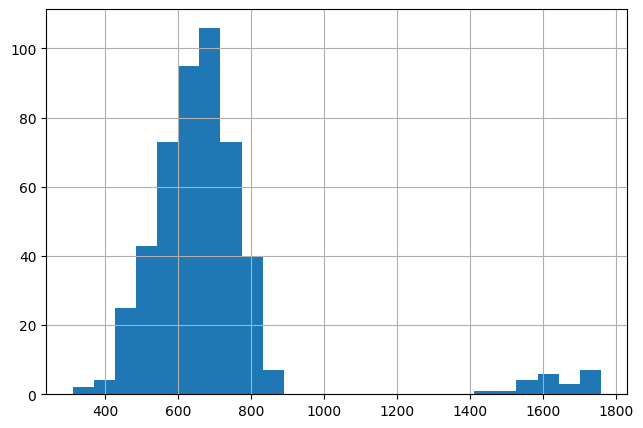

In [30]:
# build a histogram
df_customer.CreditScore.hist(bins=25);

Overall, this does appear somewhat symmetric, we could even say normally distributed.
    
However, it would appear that we have some outliers in the upper region of the plot! We could try to deal with this now, but will revisit it later...     

Although a histogram graphs a general answer to this question, we might also ask this question:

> <B>"What is the "middle" of the data?"</B>

The "middle" could be described as either the <I><B>median</B></I> (the centermost value in a sorted list of values, i.e. same number of values on either side of this value) or the <I><B>mean</B></I> (the average of all values).  In an even distribution, these would be very similar.  In this case however, because of the outliers, the median and the mean are not so close to each other. 

The "middle" of a continuous distribution is an important idea that we often use when describing and comparing distributions. Be clear about which statistical measures you employ when you want to convey an idea like "the middle."

In [31]:
df_customer['CreditScore'].median()
df_customer['CreditScore'].mean()

660.0

690.6734693877551

### Always Visualize!

We might have missed this data problem if we never visualized this particular column! If you only calculate a couple basic summary statistics (like the mean and standard deviation) in your initial data examination/cleaning steps, you are not doing enough...

Put your eyes on each variable, especially anything you will use in your reports or models. 

### Seaborn Continuous Plots

We can also use the seaborn module to examine distribution plots. The seaborn module provides a convenient interface for building plots that have very nice looking default settings.

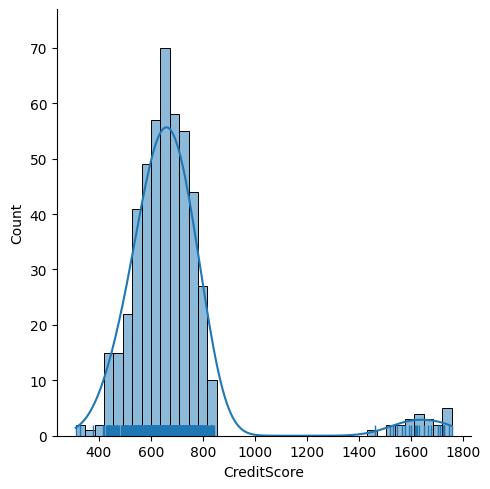

In [35]:
# Using seaborn to produce a histogram
sns.displot(df_customer['CreditScore'], kde=True, rug=True)

## Univariate Data Analysis: Categorical Variables
---

We take a different approach to this analysis for categorical data. We consider the distribution of categorical data to be the counts of the unique values or levels, or alternatively the observed probabilities for each value or level. 

Let's examine the `df_sales` table with respect to the distribution of `UrbanRural`. 

Remember, the goal is to understand the relative probabilities of each value or level occurring.  So we might ask this questions:

> <B>"What percent of sales occured for customers that live in urban vs. rural areas?"</B>

In [ ]:
df_sales.head()

If we use the `.describe()` method, how well does that answer the question?

In [41]:
df_sales.UrbanRural.info()

# Use the .describe() method on a DataFrame:
# summarize numeric columns
#df_sales.describe()

<class 'pandas.core.series.Series'>
Index: 9802 entries, 0 to 15999
Series name: UrbanRural
Non-Null Count  Dtype 
--------------  ----- 
9802 non-null   object
dtypes: object(1)
memory usage: 153.2+ KB


Given that there are 2 unique values in UrbanRural, let's see how they are distributed, with `.value_counts()`:

In [42]:
# get counts by level
df_sales.UrbanRural.value_counts()

UrbanRural
Urban    8204
Rural    1598
Name: count, dtype: int64

You can get "probabilities" (percentages) instead of counts with <B>normalize=True</B>:

In [43]:
# Get percentages/probabilities instead of counts
df_sales.UrbanRural.value_counts(normalize=True)

UrbanRural
Urban    0.836972
Rural    0.163028
Name: proportion, dtype: float64

By default, value_counts does not report any missing values. If you want to see them, you must set a flag.

In [44]:
# Show missing values
df_sales.UrbanRural.value_counts(normalize=True,          # also try this without 'normalize=True'
                                    dropna=False)           

UrbanRural
Urban    0.836972
Rural    0.163028
Name: proportion, dtype: float64

In this data, we don't have any missing data in the `UrbanRural` column, so it is equivalent to the above table.

### Bar Plots

Bar plots usually require two steps:  first we get the value counts (or some other form of .groupby() aggregation), then take those summaries and feed them into the `plot()` function.

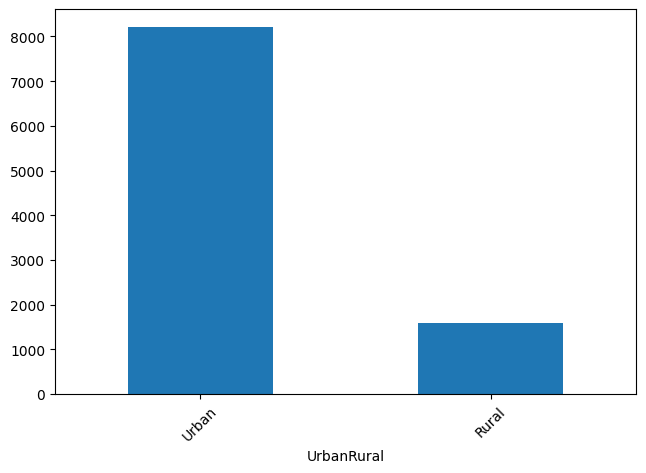

In [45]:
# bar plot with counts
( df_sales.UrbanRural.value_counts(sort=False)
                     .plot(kind='bar', rot=45) );

(I'm using parentheses around the entire value so I can shorten the length of each line.)  

<BR>Here is the same data but in a horizontal bar.  

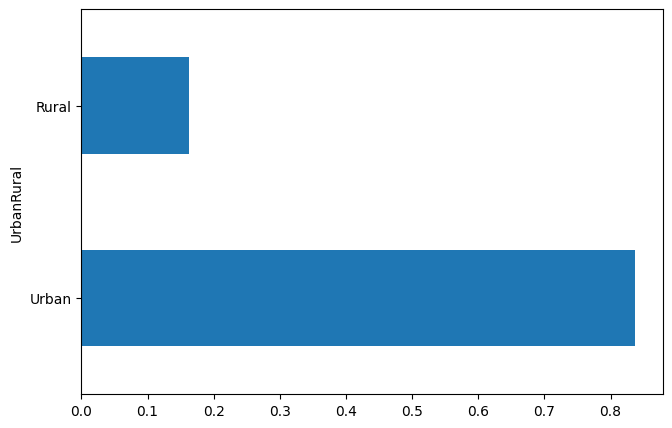

In [48]:
# bar plot showing proportions, also horizontal
df_sales.UrbanRural.value_counts(sort=False, normalize=True)   \
                   .plot(kind='barh');

(Here I'm using another method of splitting up a line:  the line continuation character or <B>\\</B>.  

<BR>
Alternatively we can use `countplot()` with seaborn. This saves us from performing the `value_counts()` step. 

In [ ]:
sns.countplot(x='UrbanRural', data=df_sales, color='salmon'); 

<br>

## Multivariate Data Analysis: Continuous by Categorical
---
If we are interested in looking at the relationship between a continuous variable and a categorical variable, we look at the distribution of the continuous variable across the different levels of the categorical variable. We can do so visually, or by using a group-by analysis.

Let's check out sales related to other variables such as age. The question we are asking is: 

> <B>"Is the distribution of `age` different when considered against 'Urban' vs. 'Rural'?"</B>

### Boxplots

One appropriate plot here is a box plot.  This plot shows the <I>quartile</I> distribution.  

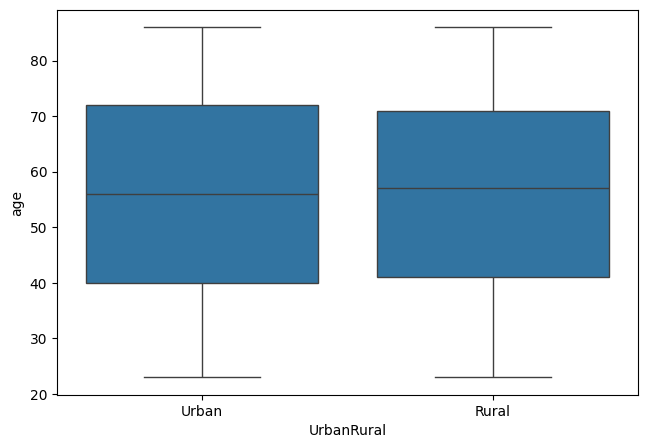

In [49]:
## visual representation by boxplots
sns.boxplot(x="UrbanRural",
            y="age",
            data=df_sales);

One useful property of boxplots is that they can help you identify outliers. Plotting the quartiles of 'sale_amount' shows some rather high prices comapred to the others. 

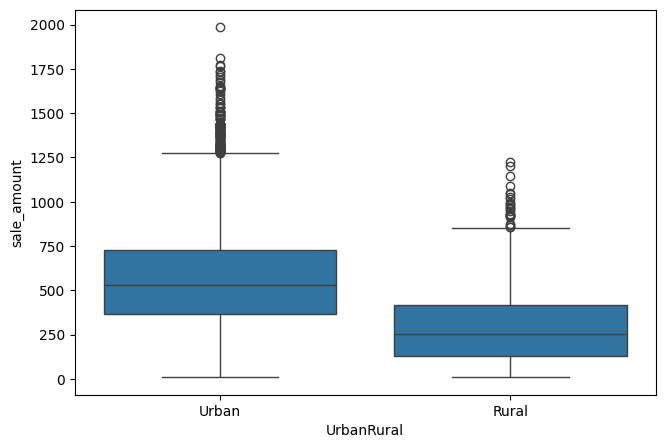

In [50]:
sns.boxplot(x="UrbanRural",
            y="sale_amount",
            data=df_sales);

Boxplots are built around quartiles of the data, and outliers are often defined as any value that lies more than 1.5 times the "interquartile range", or the 75th percentile value minus the 25th percentile value.  For a more detailed explanation see:

> [Box Plot - Wikipedia: Example with Outliers](https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers)

### Colored Histograms

Another way to visualize how distributions of a continuous variable are different across levels of a categorical variable is to use a colored  histogram or density plot.

The "hue" value allows us a 2nd plot, similar to our 'y=' addition to the box plot.

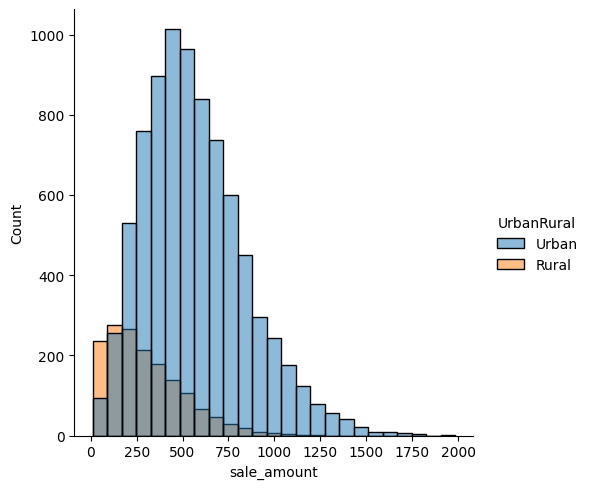

In [53]:
# colored histogram
sns.displot(x="sale_amount", hue="UrbanRural", data=df_sales, bins=25);        # try 'y=' instead of 'hue='

### Kernel Density Plots

Kernel density plots are yet another way to visualize the distribution of a continuous variable across the levels of a categorical variable.  The curve is "smoothed" by inferring the probability of intermediate values along the range of existing values.  

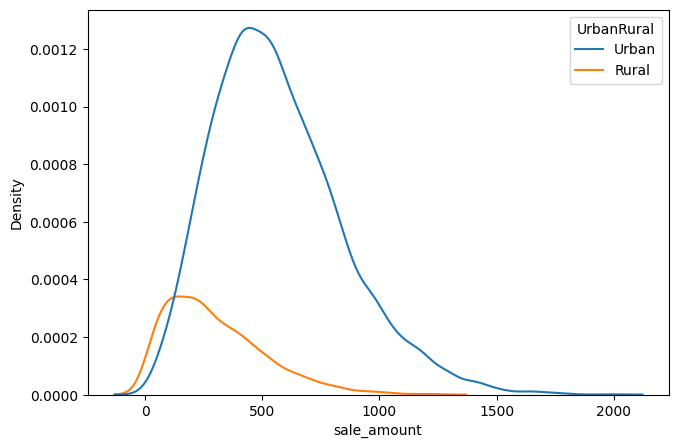

In [54]:
# kernel density plot
sns.kdeplot(x="sale_amount", hue="UrbanRural", data=df_sales);

In [ ]:
## sale amount grouped by Urban vs. Rural
df_sales.groupby('UrbanRural').sale_amount.mean()

We can even add another dimension to the boxplot. In this case we will use color as an additional signifier to allow us to look for relationships across three variables at once.

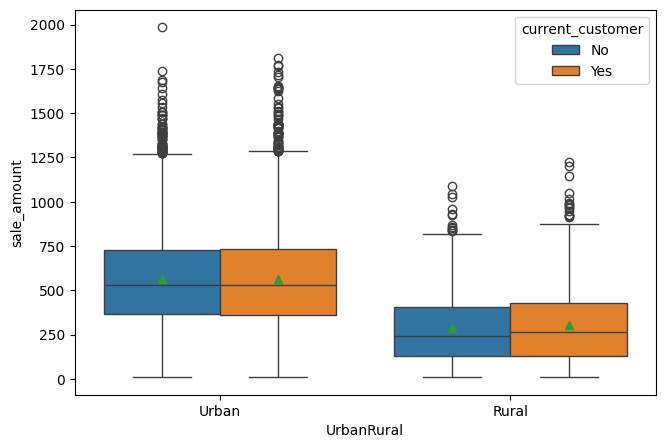

In [55]:
# add a third dimension to this plot
sns.boxplot(x="UrbanRural", 
            y="sale_amount",
            hue='current_customer',
            data=df_sales,
            showmeans=True);          # marked by the green triangle

### Revisit Credit Scores
Let's revisit those credit scores from the customer data set. There was a set of outliers than had implausibly high values. What if those values are related to another variable that we have measured?

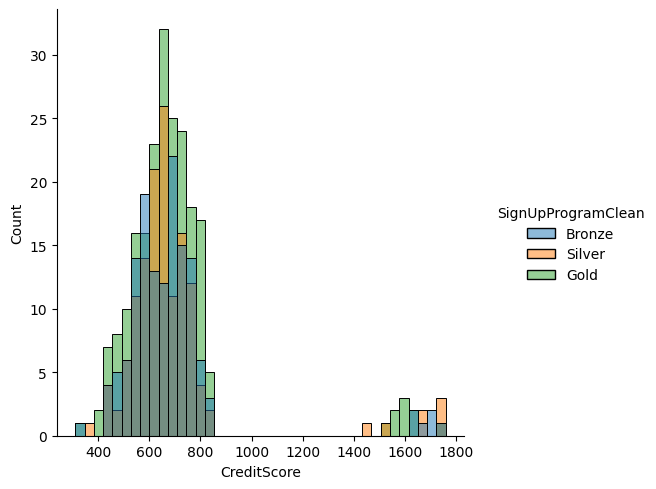

In [57]:
## are the outliers related to sign up program?
sns.displot(x='CreditScore', 
            hue='SignUpProgramClean', 
            data=df_customer, 
            kind='kde');

Okay... It's not the sign up program.

What other factors might help identify this issue?  Could it be related to state of residence?  We can check how many customers come from each state:

In [60]:
df_customer.State.value_counts()

State
CA    46
TX    35
IL    32
NY    30
FL    24
NJ    22
PA    18
MI    16
NC    16
WA    13
MN    13
OH    13
MA    13
GA    12
CT    12
MD    12
MO    11
TN    11
IN    10
SC    10
VA     9
KS     7
DC     7
AR     6
AL     6
LA     6
AZ     6
WI     6
CO     6
MS     5
IA     5
WY     5
RI     5
NE     5
OK     5
UT     4
NH     4
WV     3
ND     3
ME     3
ID     3
KY     3
OR     3
NM     3
DE     2
AK     2
NV     2
SD     2
MT     2
MP     1
VT     1
HI     1
Name: count, dtype: int64

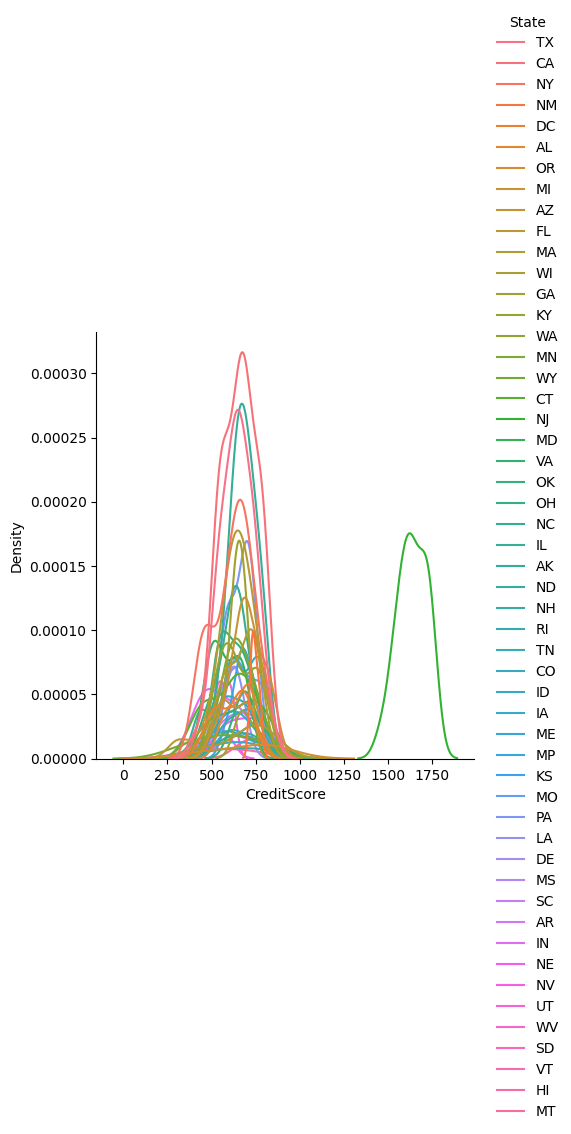

In [61]:
## are the outliers related to customer's state of residence?
sns.displot(x='CreditScore', 
            hue='State', 
            data=df_customer, 
            kind='kde', 
            legend=True,           # the legend just added clutter here
            warn_singular=False     # some states have only a single customer
           ); 

We got it! All the customers with strange credit scores are from the same state.

Which state was it???

In [62]:
# df_customer.loc[ df_customer['CreditScore'] > 850, 'State' ].unique()

df_customer.query('CreditScore > 850').State.unique()

array(['NJ'], dtype=object)

It appears that all the strange credit scores are from customers in New Jersey.

<br>

## Multivariate Data Analysis: Continuous by Continuous Data
---

So how can we identify the relationship between two continuous variables? This is going to be the same idea as what we just went over with continuous/categorical data.  We might ask a question like this one: 

> <B>"How does age correlate with sale amount?"</B>

So what does that look like when both variables are continuous? Let's first consider `age.`

In [64]:
df_sales.age.describe()

count    9802.000000
mean       55.839114
std        18.107371
min        23.000000
25%        40.000000
50%        56.500000
75%        72.000000
max        86.000000
Name: age, dtype: float64

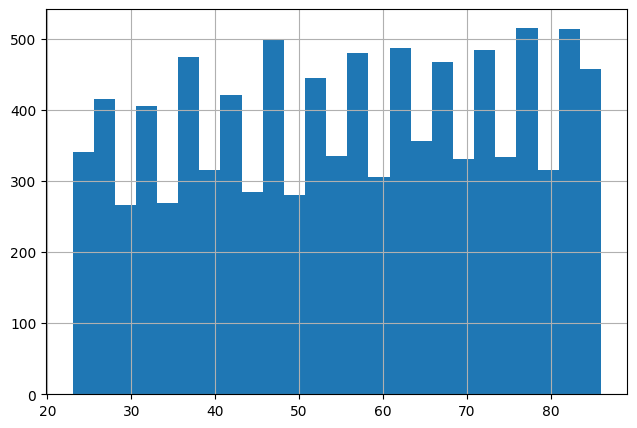

In [65]:
df_sales.age.hist(bins=25);

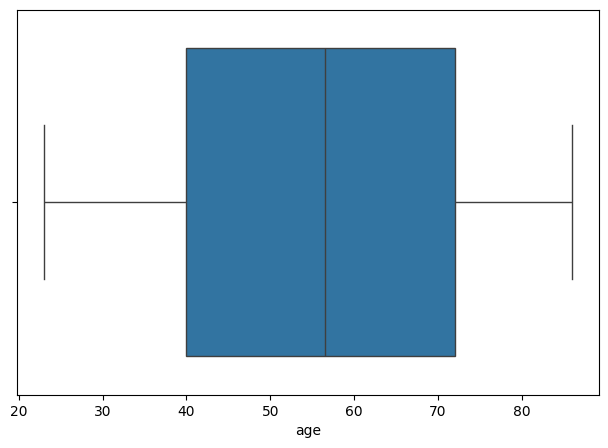

In [68]:
sns.boxplot(x="age",
            data=df_sales);

### Scatterplots

The most common method for examining associations between two continuous variables is to make a scatterplot.

Here we access the Pandas DataFrame plotting module, where there is a `scatter()` function we can use the specify which columns from the DataFrame should be used in constructing the plot.

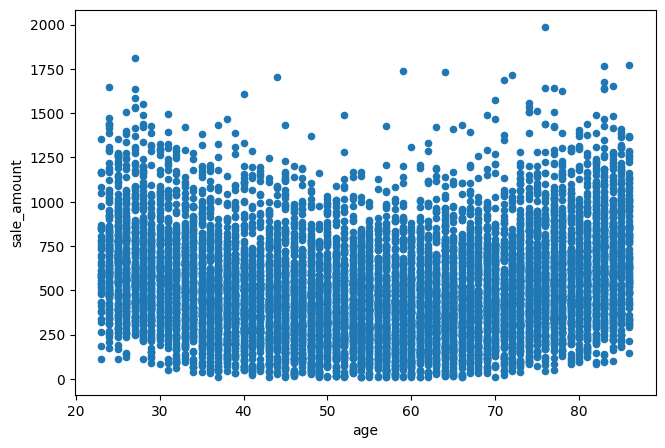

In [69]:
# cont by cont
df_sales.plot.scatter(x='age',
                      y='sale_amount');

This is simulated data, so in this case it may look a little unusual. Our young spenders seem similar to our older spenders.

Do you see a shape to this data? How would you describe this shape?

There is an issue here with data density and data points on top of each other ("occlusion.")

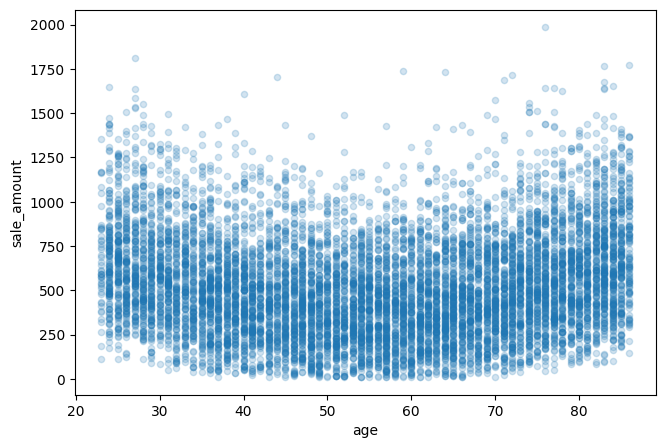

In [70]:
# Too much data! Adjust the alpha (opacity) to see better.  (0.2 is a good number)
df_sales.plot.scatter(x='age',
                      y='sale_amount',
                      alpha=0.2);

### Regression Line

We can also try to summarize the relationship between two variables using a *line of best fit*. In the next example we try to fit a linear regression line to this data.  We can use the seaborn `.regplot()` function, an analogue to `.scatter()`, along with a line that should hopefully track a trend in the relationship bewteen the two factors.

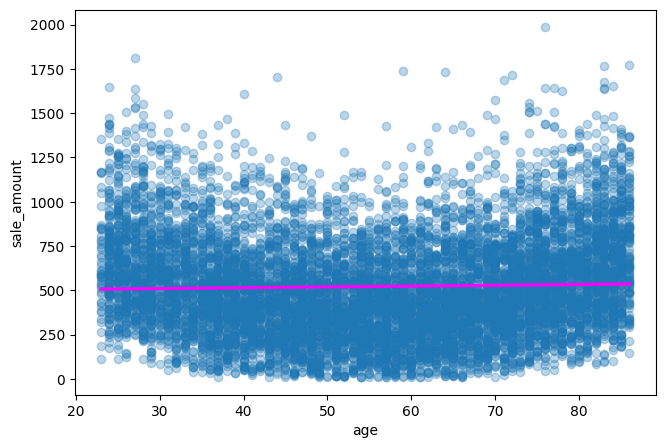

In [71]:
# Show a regression line
sns.regplot(x="age", 
            y="sale_amount",
            data=df_sales,
            scatter_kws={'alpha':0.3, 'marker':"v"},
            line_kws={'color':'magenta'});

What is your conclusion... is there any relationship between age and sale amount? 

> Do you think a straight line is the "best fit" for this data?

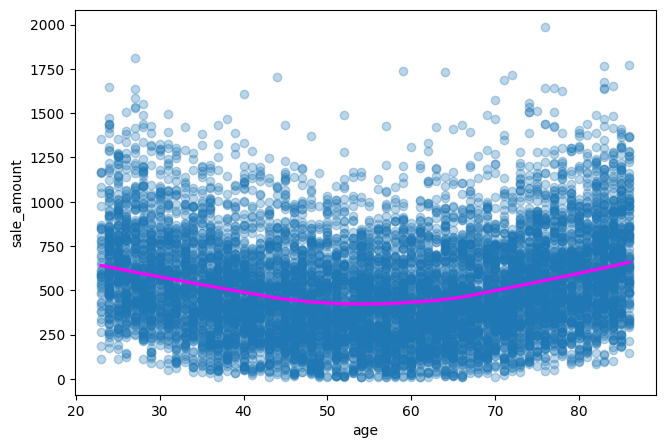

In [73]:
## try a more flexible line-fitting approach
sns.regplot(x="age", 
            y="sale_amount",
            data=df_sales,
            lowess=True,                            # <--- note this addition
            scatter_kws={'alpha':0.3, 'marker':"v"},
            line_kws={'color':'magenta'});

LOWESS ("locally weighted scatterplot smoothing" or "locally weighted linear regression") uses an algorithm from the `statsmodels` module to create a smooth line through a timeplot or scatter plot to help you to see relationship between variables and to foresee trends.  

### Line Plots
Another way to examine the relationship between two continuous variables is to make a line plot. This type of plot uses an aggregating function to summarize how one variable changes across the levels of another. It's a very similar idea to the regression lines we were previously fitting on top of the scatterplots.

Line plots are particularly common when you have a measure of time as a variable, but let's make a line plot here to continue examining the relationship between age and sales amounts. In this case the `lineplot()` function is performing an aggregation using the mean function as an estimator. What we are viewing in the following plot is the mean sale amounts across different ages.

The lightly colored 'halo' around the line is the "confidence interval band" or "error band".  This represents the variability in the mean of the data at each point.  (The "confidence interval" is typically set at 95% -- that is, it depicts where 95% of the values lie in relation to the mean.)

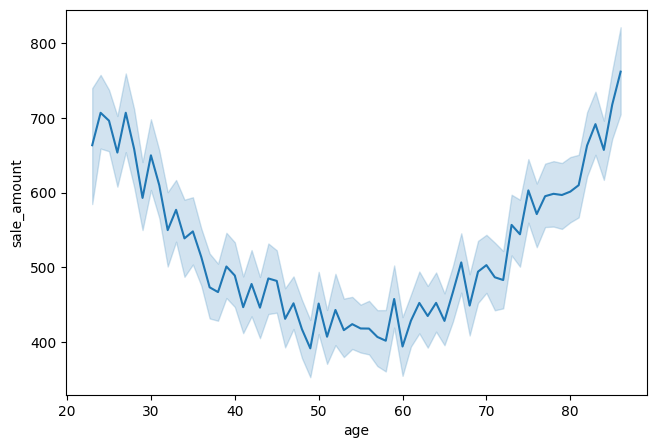

In [74]:
# mean sale amount across age
sns.lineplot(x='age',
             y='sale_amount',
             data=df_sales,
             estimator='mean');

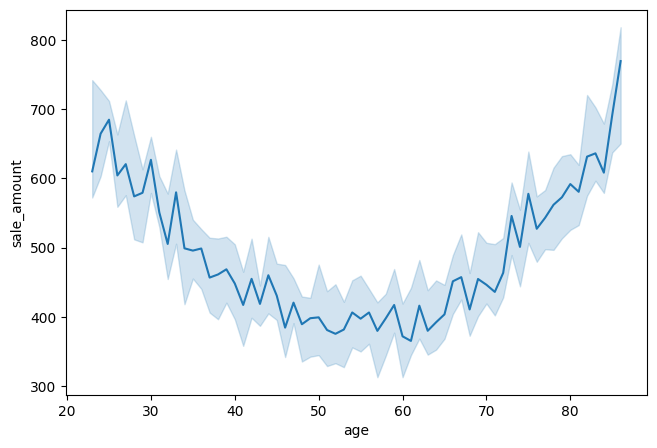

In [75]:
# median sale amount across age
sns.lineplot(x='age',
             y='sale_amount',
             data=df_sales,
             estimator=np.median);     # <-- same as above, but 'median' instead of 'mean'

We can use color (or 'hue') and line types to see how this differs across levels of another categorical variable.  (It is a best practice to adjust both the hue and line type to make your plots color-blind friendly.)

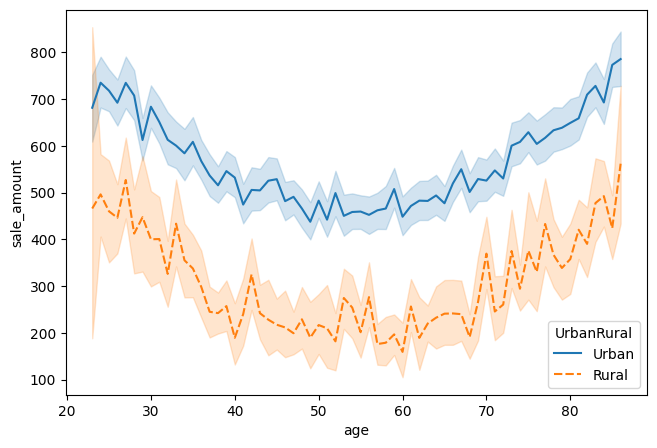

In [77]:
# mean sale amount across age stratified by place of residence
sns.lineplot(x='age',
             y='sale_amount',
             hue='UrbanRural',
             style='UrbanRural',
             data=df_sales,
             estimator='mean');

<br>

## Multivariate EDA: Categorical by Categorical
---
Another example of pairwise data analysis is to examine if a categorical variable is related to another categorical variable. This is traditionally done by looking at frequency tables. 

We can start by looking at the overall probability of a variable taking on a specific value.

In [78]:
df_sales.activity.value_counts()

activity
Med     4553
Low     2987
High    2262
Name: count, dtype: int64

In [79]:
df_sales.activity.value_counts(normalize=True)

activity
Med     0.464497
Low     0.304734
High    0.230769
Name: proportion, dtype: float64

Do you think `activity` and `UrbanRural` are related in this dataset? If `activity` is not related to `UrbanRural`, then the probability of someone living in an urban area should be the same across all the different `activity` levels. If there is a relationship, it will deviate.

We can check this by constructing a frequency table using the `pd.crosstab()` function. 

In [80]:
# Frequency table with counts
pd.crosstab(df_sales['activity'],
            df_sales['UrbanRural'])

UrbanRural,Rural,Urban
activity,,
High,365,1897
Low,485,2502
Med,748,3805


We can add the Location percentages by identifying the correct dimension, and adding the `normalize='columns'` argument. If we wanted the row-wise percentages, we could choose `normalize='index'`.

In [81]:
pd.crosstab(df_sales['activity'],
            df_sales['UrbanRural'],
            normalize='columns')

UrbanRural,Rural,Urban
activity,,
High,0.228411,0.231229
Low,0.303504,0.304973
Med,0.468085,0.463798


Since the likelihood of being <B>Rural</B> or <B>Urban</B> is the same for each activity level, it appears that there is no relationship between the two factors.  What do you think?



## Additional Types of Plots
---
There are a couple of additional types of plots that are useful to know about when doing exploratory analysis.

### Pairs Plot
One quick and easy way to look at all the continuous (not discrete) variables in the dataset is to create a pairs plot. This plots the histogram of each variable on the diagonal, with a scatterplot on the off-diagonals.

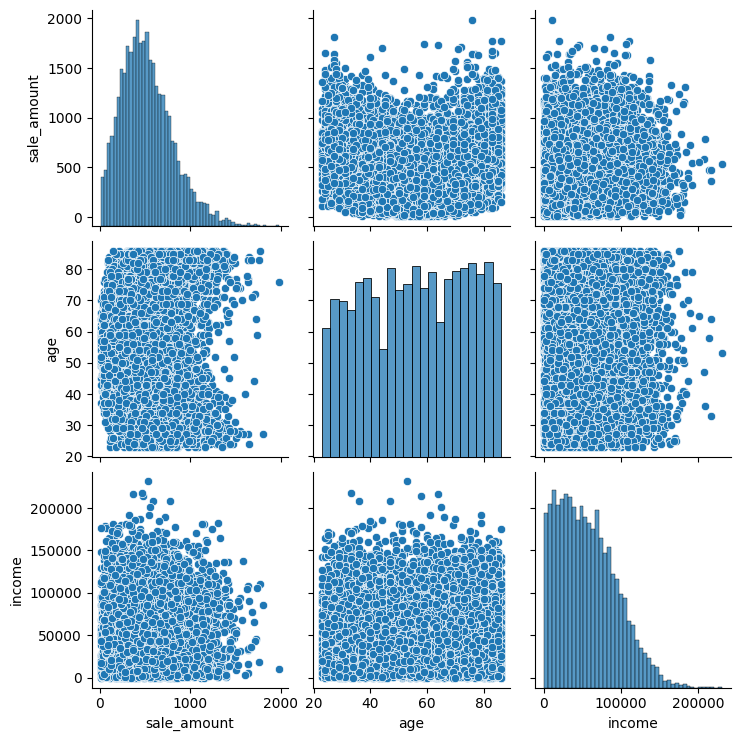

In [82]:
## WARNING, this might take a couple of minutes to run
sns.pairplot(df_sales);

The only really interesting trend we observe here is the age by sales amount relationship.

### Small Multiples

Sometimes it helps to break up a visualization into many smaller plots for visual clarity.

Other times it helps to "facet" a plot across a variable, to provide side-by-side comparisons. 

Seaborn provides many variations on this. We will use the `lmplot()` function which builds scatterplots and adds a best fitting regression line. Specifying the `col=` and `row=` arguments tells the plotting function how to stratify the subplots.

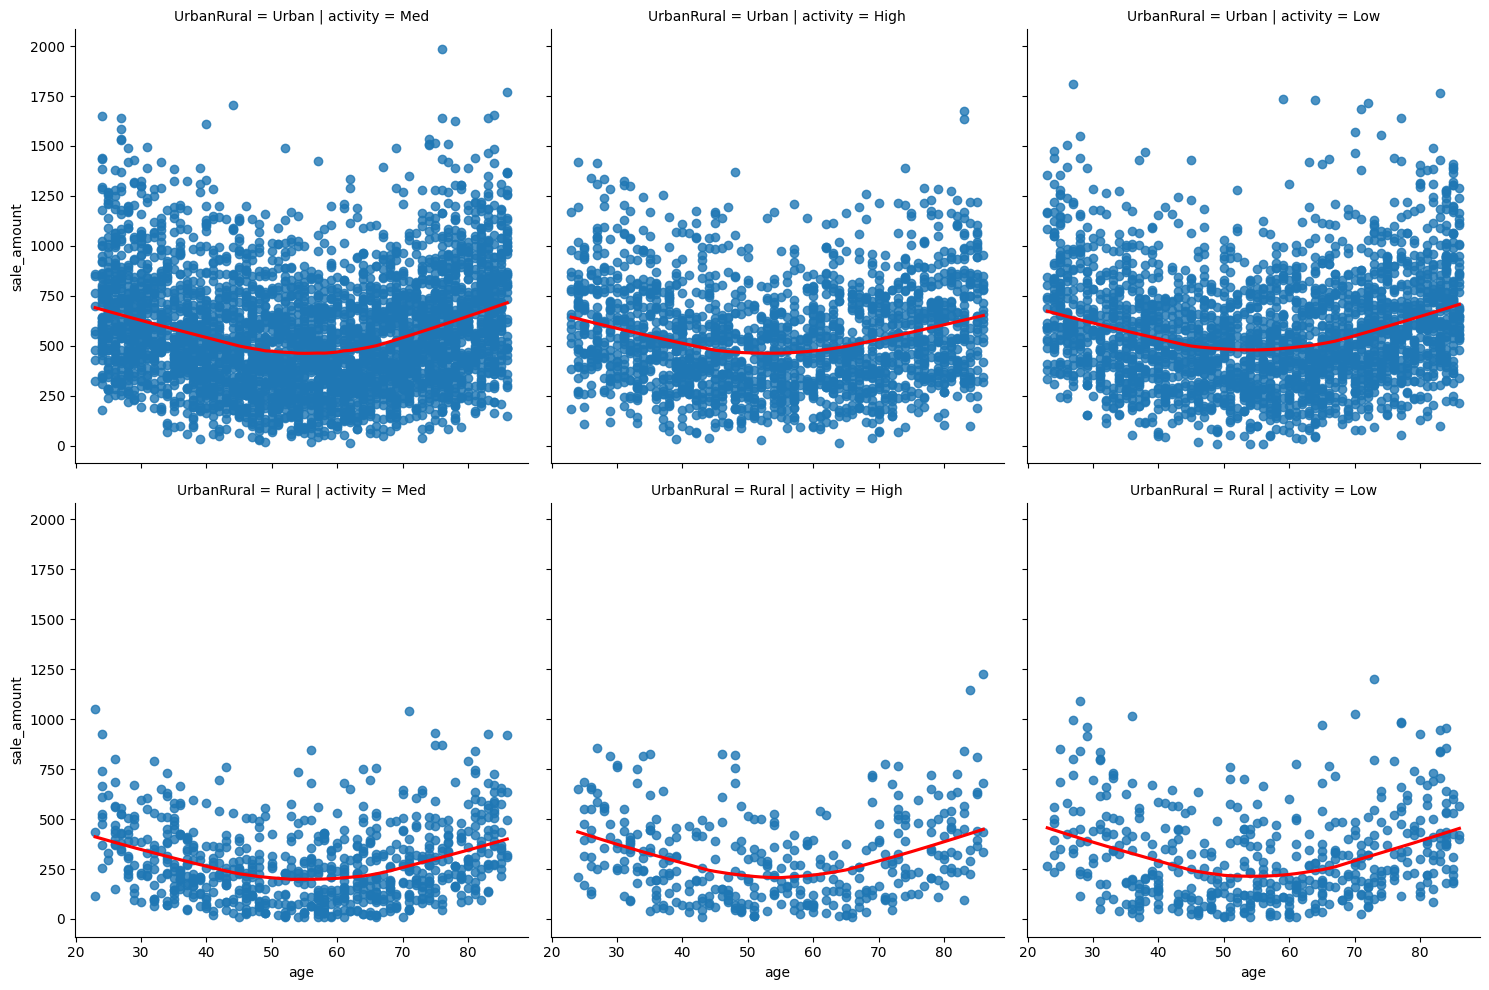

In [84]:
sns.lmplot(data=df_sales,
           x='age',
           y='sale_amount',
           row='UrbanRural',
           col='activity',
           lowess=True,
           line_kws={'color':'red'});

The relationship between age and sale amount seems very consistent between all the combinations of levels of `activity` and 'UrbanRural`.